<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


<msg desc="Text shown above a link to https://www.youtube.com/watch?v=V7RXyqFUR98 which highlights some helpful features in Colab">Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.</msg>

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  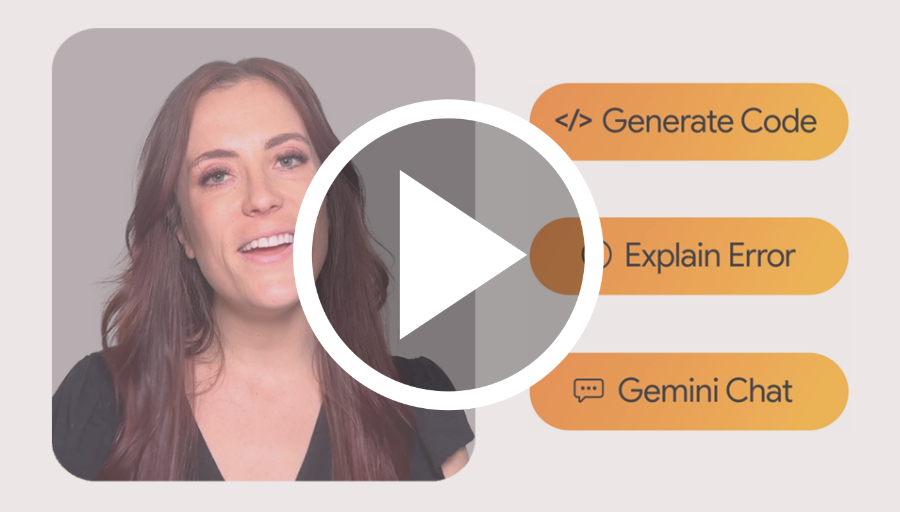
  </a>
</center>

# **Credit Risk Prediction ,Analysis and Modelling**

## **Introduction**

## **Source of Dataset:** https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data

CSIT696-Research Methods in Computing

Naveen reddy Bokka

#**Data Preparation**

##**Importing neccessary Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:

df=pd.read_csv('/content/credit_risk_dataset.csv')

##**Description of the dataset**:
The Credit Risk dataset chosen from Kaggle, is an extensive collection of
information about loan candidates. It includes specifics about the applicant's age,
income, employment history, home ownership status, intent to borrow, loan
amount, interest rate, grade, loan status, percentage of income, and default
history on file. The objective, loan grade, loan amount, interest rate, loan status,
loan percentage income, and default history of the loan applicant are all listed in
the dataset. This data is essential for credit risk analysis and for creating models
that forecast the chance of a loan default.

###**Preparation and Exploration of the dataset**

In [3]:
df.head()

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  
1                 0.10                         N                           2  
2                 0.57                         N                           3  
3                 0.53                         N                           2  
4                 0.55                         Y                           4

In [4]:
df.shape

(32581, 12)

In [5]:
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [ ]:
# Value counts for categorical columns
df['person_home_ownership'].value_counts()



person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64

In [ ]:
df['loan_intent'].value_counts()

loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

In [ ]:
print(df['loan_grade'].value_counts())

loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64


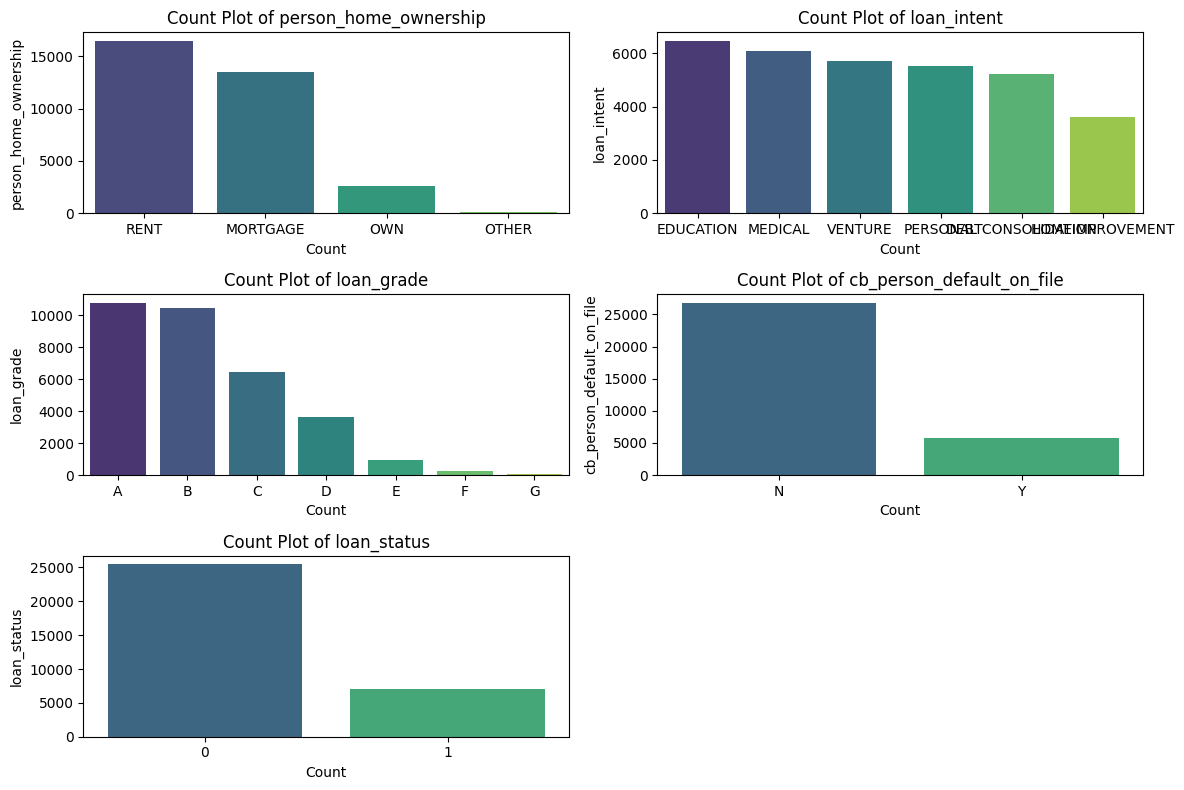

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'loan_status']
for i, col in enumerate(categorical_columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()
warnings.simplefilter(action='default', category=FutureWarning)

<ipython-input-5-c0f477397e86>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels
<ipython-input-5-c0f477397e86>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels
<ipython-input-5-c0f477397e86>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels
<ipython-input-5-c0f477397e86>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels
<ipython-input-5-c0f477397e8

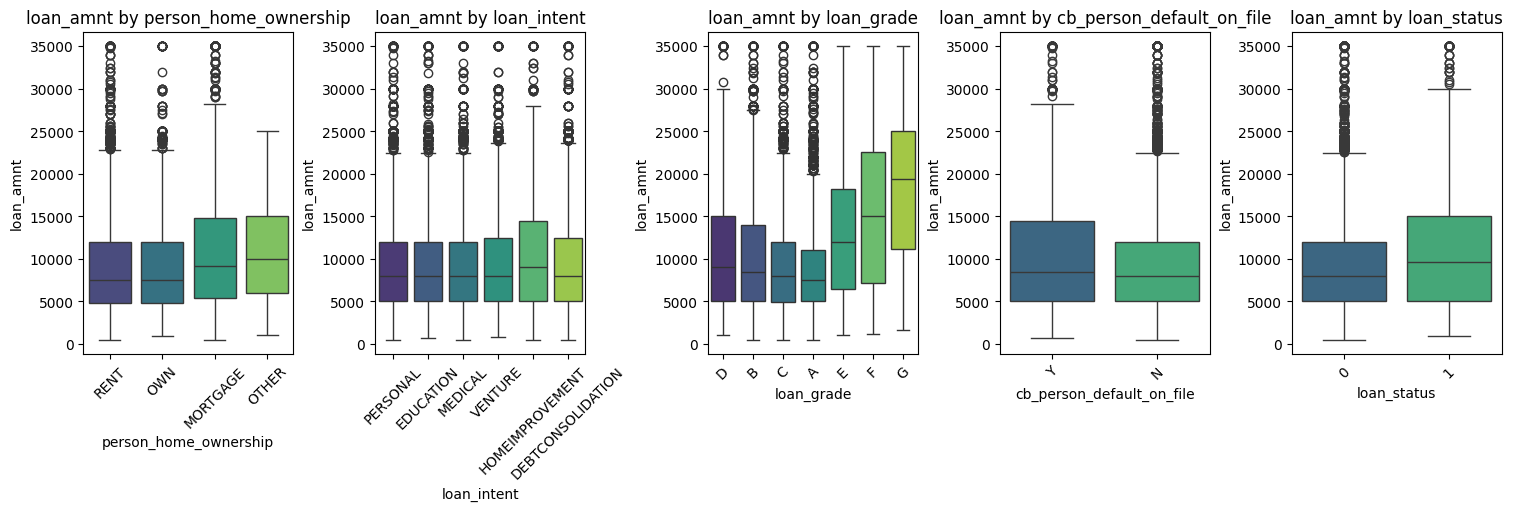

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
numeric_column = 'loan_amnt'
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'loan_status']

# Ignore FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create subplots for a row of plots
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5), constrained_layout=True)

for ax, col in zip(axes, categorical_columns):
    sns.boxplot(x=col, y=numeric_column, data=df, palette='viridis', ax=ax)
    ax.set_title(f'{numeric_column} by {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels

# Show the final row of plots
plt.show()


In [ ]:
import numpy as np

unique, counts = np.unique(df['loan_status'], return_counts=True)
dict(zip(unique, counts))


{0: 25473, 1: 7108}

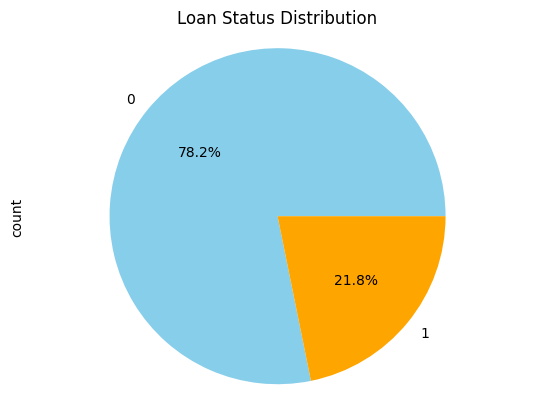

In [ ]:
df['loan_status'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=('skyblue', 'orange'))
plt.title('Loan Status Distribution')
plt.axis('equal')

plt.show()

<Axes: >

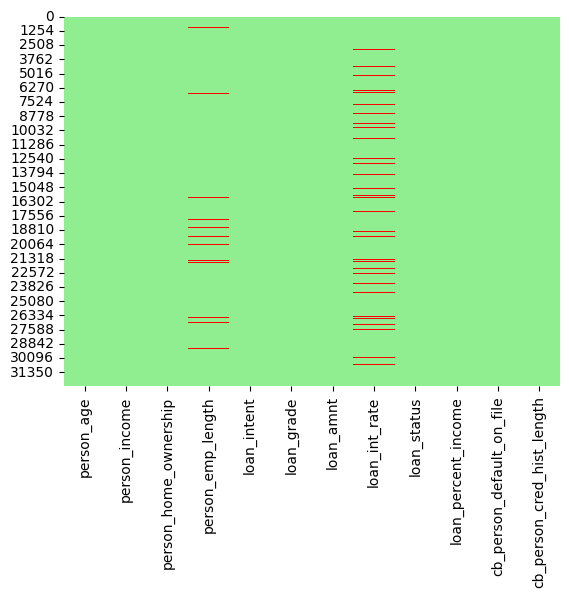

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap=['lightgreen', 'red'])




In [6]:
# Remove specified columns from the DataFrame
columns_to_remove = ['cb_person_default_on_file', 'person_emp_length', 'cb_person_cred_hist_length']
df = df.drop(columns=columns_to_remove)


print(f"Updated DataFrame shape: {df.shape}")
print(df.head())


Updated DataFrame shape: (32581, 9)
   person_age  person_income person_home_ownership loan_intent loan_grade  \
0          22          59000                  RENT    PERSONAL          D   
1          21           9600                   OWN   EDUCATION          B   
2          25           9600              MORTGAGE     MEDICAL          C   
3          23          65500                  RENT     MEDICAL          C   
4          24          54400                  RENT     MEDICAL          C   

   loan_amnt  loan_int_rate  loan_status  loan_percent_income  
0      35000          16.02            1                 0.59  
1       1000          11.14            0                 0.10  
2       5500          12.87            1                 0.57  
3      35000          15.23            1                 0.53  
4      35000          14.27            1                 0.55  


In [ ]:
df.isnull().sum()

person_age                  0
person_income               0
person_home_ownership       0
loan_intent                 0
loan_grade                  0
loan_amnt                   0
loan_int_rate            3116
loan_status                 0
loan_percent_income         0
dtype: int64

In [7]:
imputer = SimpleImputer(strategy='mean')

# Reshape the data to 2D array for the imputer
loan_int_rate_new = df[['loan_int_rate']]

# Fit the imputer and transform the data to fill missing values
df['loan_int_rate'] = imputer.fit_transform(loan_int_rate_new)

# Verify the imputation
print("Missing values after imputation:")
print(df['loan_int_rate'].isnull().sum())

Missing values after imputation:
0


In [ ]:
df.isnull().sum()

person_age               0
person_income            0
person_home_ownership    0
loan_intent              0
loan_grade               0
loan_amnt                0
loan_int_rate            0
loan_status              0
loan_percent_income      0
dtype: int64

<Axes: >

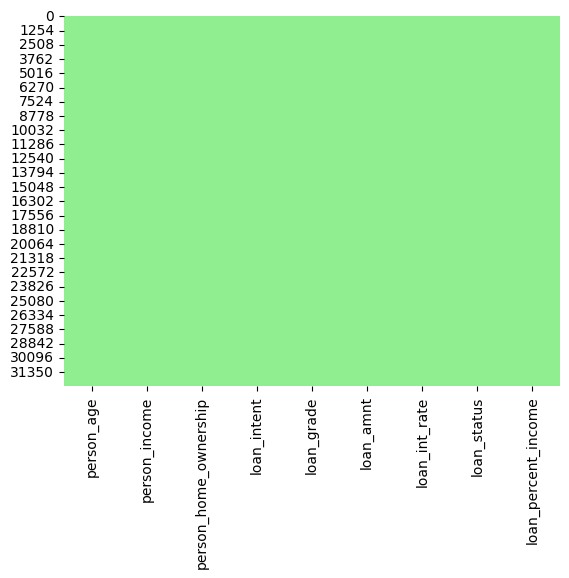

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap=['lightgreen', 'red'])

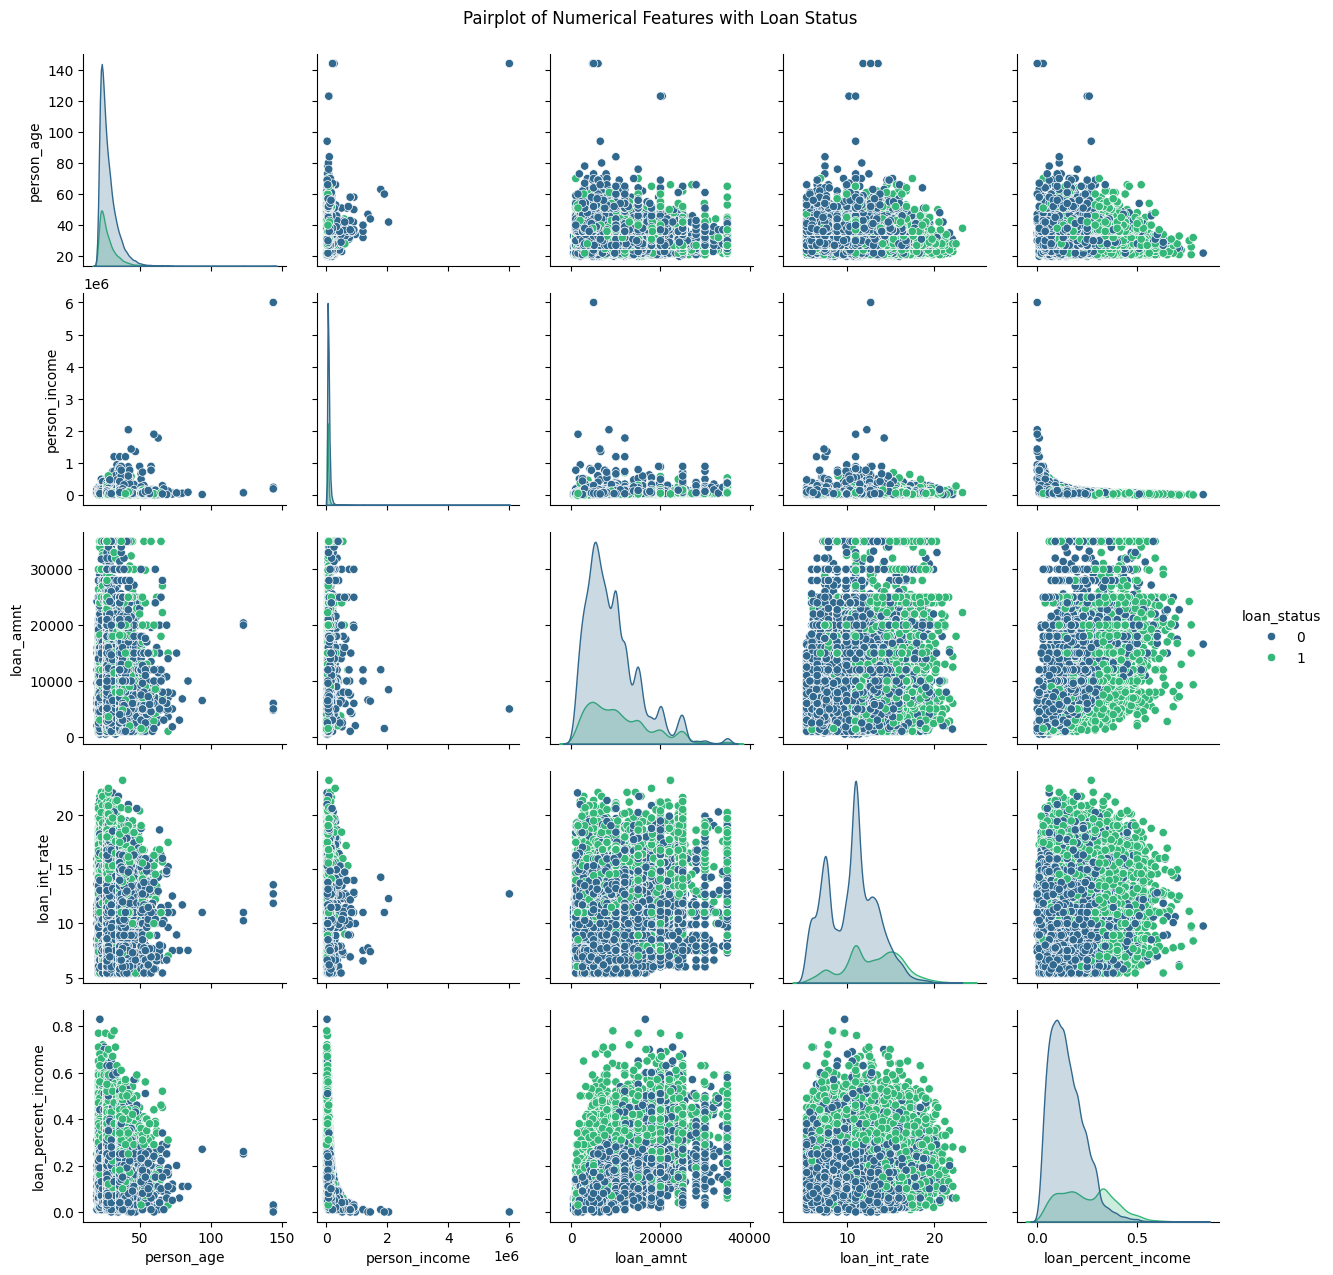

In [ ]:
numerical_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'loan_status']


sns.pairplot(df[numerical_cols], hue='loan_status', palette='viridis')


plt.suptitle('Pairplot of Numerical Features with Loan Status', y=1.02)
plt.show()

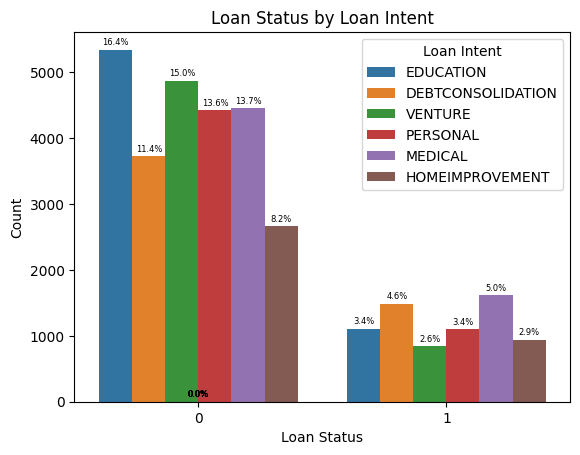

In [ ]:
ax = sns.countplot(x=df["loan_status"], hue=df["loan_intent"])
total = float(len(df["loan_status"]))

# Get the total count for each group
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=6, color='black', xytext=(0, 5),
                textcoords='offset points')


plt.title("Loan Status by Loan Intent")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.legend(title="Loan Intent")
plt.show()

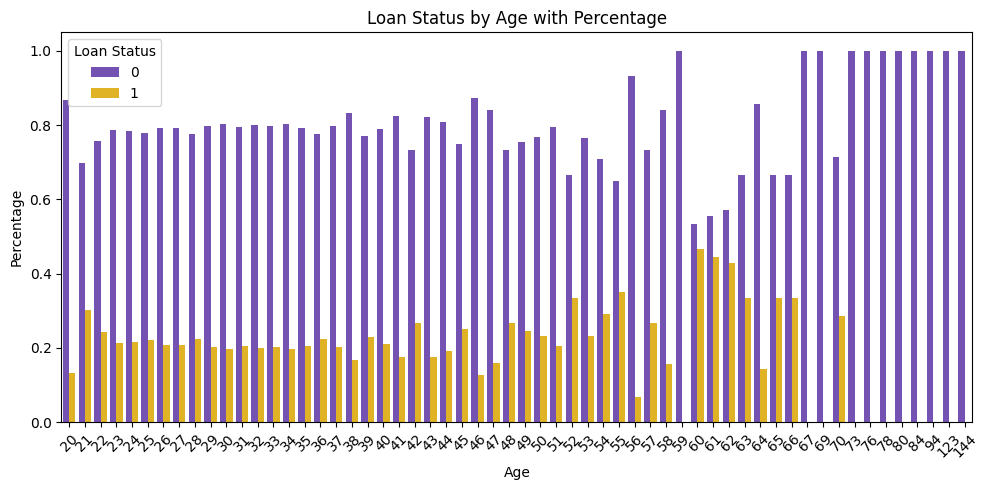

In [ ]:
loan_status_percentage = df.groupby(['person_age', 'loan_status']).size() / df.groupby('person_age').size()
loan_status_percentage = loan_status_percentage.reset_index(name='percentage')

plt.figure(figsize=(10, 5))
custom_colors = ['#6f42c1', '#ffc107']
ax = sns.barplot(x="person_age", y="percentage", hue="loan_status", data=loan_status_percentage,palette=custom_colors)
plt.title("Loan Status by Age with Percentage")
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.legend(title="Loan Status")


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

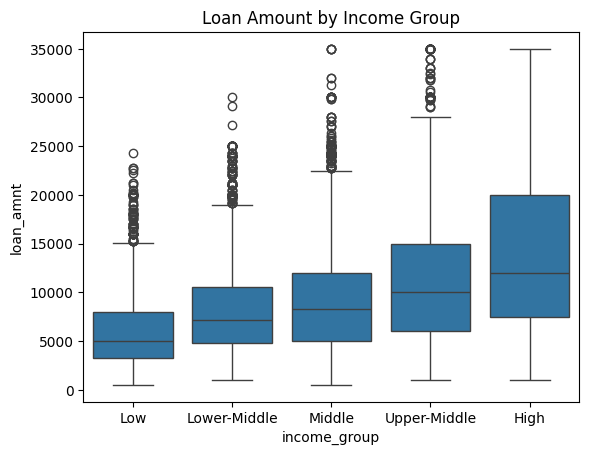

In [ ]:
df['income_group'] = pd.qcut(df['person_income'], 5, labels=['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High'])
sns.boxplot(x='income_group', y='loan_amnt', data=df)
plt.title("Loan Amount by Income Group")
plt.show()


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier

In [9]:
y_credit = df['loan_status']
X_credit = df.drop(['loan_status'], axis=1)

In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership', 'loan_intent',
       'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_status',
       'loan_percent_income'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_age             32581 non-null  int64  
 1   person_income          32581 non-null  int64  
 2   person_home_ownership  32581 non-null  object 
 3   loan_intent            32581 non-null  object 
 4   loan_grade             32581 non-null  object 
 5   loan_amnt              32581 non-null  int64  
 6   loan_int_rate          32581 non-null  float64
 7   loan_status            32581 non-null  int64  
 8   loan_percent_income    32581 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 2.2+ MB


In [10]:
#to convert the categorical column to numerical column
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade'], drop_first=True)

In [11]:
df.columns

Index(['person_age', 'person_income', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G'],
      dtype='object')

In [12]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


# **KNN  before balancing the data**

In [14]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

y_pred_prob_knn = knn.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(y_test, y_pred_prob_knn))
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

ROC AUC:  0.8074747581247068
[[4717  388]
 [ 734  678]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      5105
           1       0.64      0.48      0.55      1412

    accuracy                           0.83      6517
   macro avg       0.75      0.70      0.72      6517
weighted avg       0.82      0.83      0.82      6517



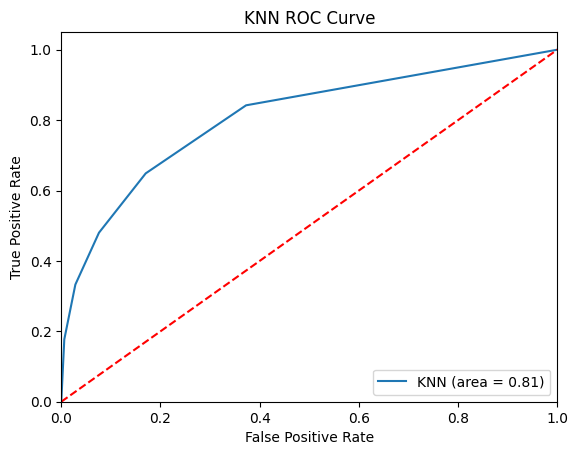

In [15]:
knn_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc='lower right')
plt.show()

# **KNN  after balancing the data**

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=2)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())

Before SMOTE: loan_status
0    25473
1     7108
Name: count, dtype: int64
After SMOTE: loan_status
1    25473
0    25473
Name: count, dtype: int64


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=2)

In [21]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

y_pred_prob_knn = knn.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(y_test, y_pred_prob_knn))
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

ROC AUC:  0.8970005421351701
[[6085 1519]
 [1204 6476]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      7604
           1       0.81      0.84      0.83      7680

    accuracy                           0.82     15284
   macro avg       0.82      0.82      0.82     15284
weighted avg       0.82      0.82      0.82     15284



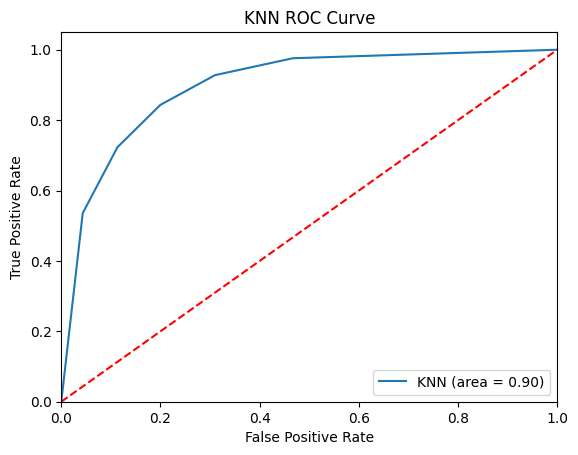

In [22]:
knn_roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Optimal value of k based on ROC AUC using cross-validation**

<Axes: xlabel='K', ylabel='ROC AUC'>

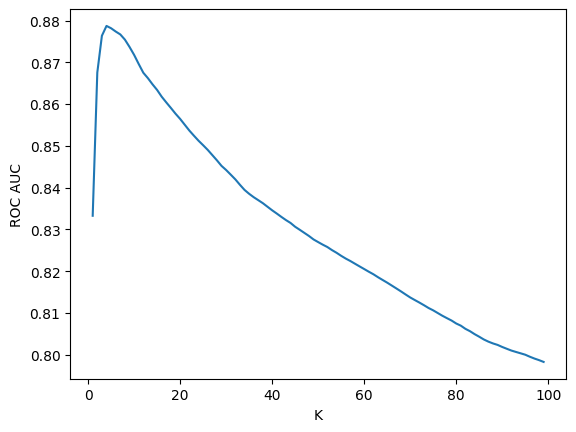

In [23]:
max_K = 100
cv_scores = []

for K in range (1, max_K):
  knn = KNeighborsClassifier(n_neighbors = K,metric='euclidean')
  scores = cross_val_score(knn,X_train,y_train.values.ravel(), cv = 3, scoring = "roc_auc" )
  cv_scores.append(scores.mean())

ax = sns.lineplot( x = range(1, max_K), y = cv_scores)
ax.set(xlabel = "K", ylabel = "ROC AUC")
ax

In [24]:
cv_scores[:5]

[0.8332706165489764,
 0.8675595877989535,
 0.8763644297518803,
 0.8787193176586876,
 0.8781597859522421]

# **Finding the index of the maximum ROC AUC value**s

In [25]:
optimal_k_index = np.argmax(cv_scores)


optimal_k = optimal_k_index + 1
max_roc_auc = cv_scores[optimal_k_index]


print('Optimal k for maximum ROC AUC:', optimal_k)
print('Maximum ROC AUC:', max_roc_auc)

Optimal k for maximum ROC AUC: 4
Maximum ROC AUC: 0.8787193176586876


**Optimize KNN model with K = 4**

In [26]:
knn1 = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn1.fit(X_train, y_train)

y_pred_knn1 = knn1.predict(X_test)

y_pred_prob_knn1 = knn1.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(y_test, y_pred_prob_knn1))
print(confusion_matrix(y_test,y_pred_knn1))
print(classification_report(y_test,y_pred_knn1))

ROC AUC:  0.8971001162354244
[[6528 1076]
 [1635 6045]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      7604
           1       0.85      0.79      0.82      7680

    accuracy                           0.82     15284
   macro avg       0.82      0.82      0.82     15284
weighted avg       0.82      0.82      0.82     15284



In [27]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=4)

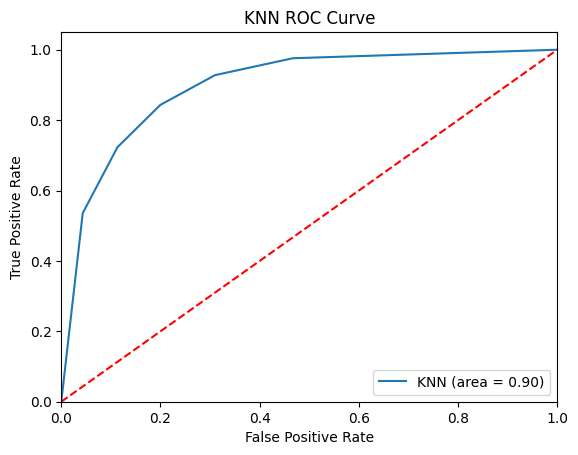

In [28]:
knn_roc_auc = roc_auc_score(y_test, knn1.predict_proba(X_test)[:,1])
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, knn1.predict_proba(X_test)[:,1])
plt.figure
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc='lower right')
plt.show()


**kNN Model** – The kNN model achieved 89.71% accuracy. For loan rejection (0), it performed well with 0.80 precision, 0.86 recall, and an F1-score of 0.83. For loan approval (1), it had 0.85 precision, 0.79 recall, and an F1-score of 0.82, showing some difficulty in identifying approvals. Overall, the model effectively distinguishes between approved and rejected loans.

#logistic regression

In [52]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

y_pred_LR = logmodel.predict(X_test)

y_pred_prob_LR = logmodel.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(y_test, y_pred_prob_LR))
print(confusion_matrix(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))

ROC AUC:  0.937070041946125
[[6812  792]
 [1174 6506]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      7604
           1       0.89      0.85      0.87      7680

    accuracy                           0.87     15284
   macro avg       0.87      0.87      0.87     15284
weighted avg       0.87      0.87      0.87     15284



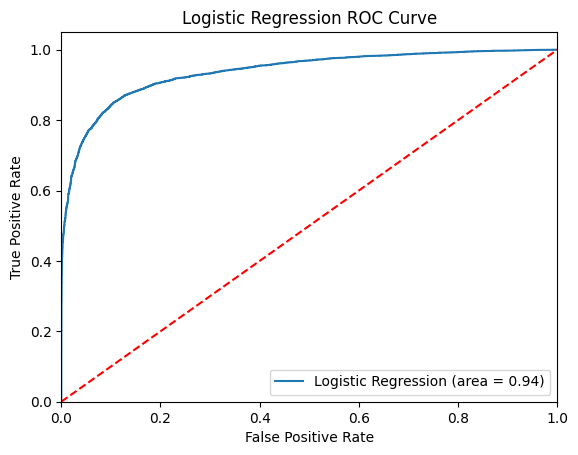

In [53]:
logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' %logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

# **Random Forest**

In [29]:
rf_model = RandomForestClassifier(max_depth=7, random_state=1)
rf_model.fit(X_test, y_test)
y_pred_rf = rf_model.predict(X_test)

y_pred_prob_rf = rf_model.predict_proba(X_test)[:,1]

print('ROC AUC: ', roc_auc_score(y_test, y_pred_prob_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

ROC AUC:  0.9581675420283186
[[7242  362]
 [1071 6609]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7604
           1       0.95      0.86      0.90      7680

    accuracy                           0.91     15284
   macro avg       0.91      0.91      0.91     15284
weighted avg       0.91      0.91      0.91     15284



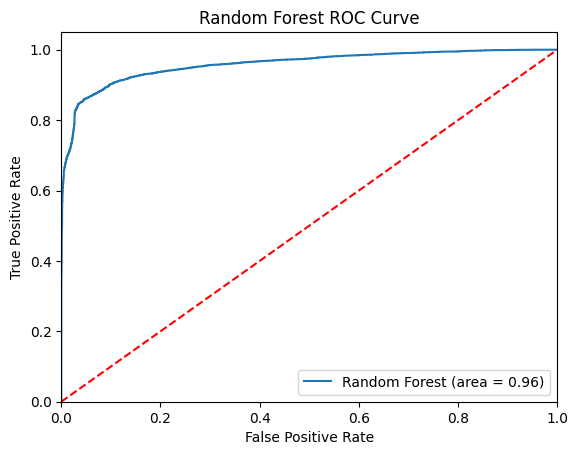

In [30]:
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest (area = %0.2f)' %rf_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

**Random Forest Model** – The Random Forest model achieved an accuracy of 92%. For loan approvals (1), it showed a precision of 0.95, meaning that 95% of the approved loans identified by the model were correct, and a recall of 0.86, indicating it correctly identified 86% of all actual approved loans. For loan rejections (0), the model performed well with a precision of 0.87 and a recall of 0.95, meaning it accurately identified 95% of rejected loans. Overall, the model effectively distinguishes between approved and rejected loans.

# #**Boosted Tree**

In [31]:
bt_model = AdaBoostClassifier(n_estimators = 100)
bt_model.fit(X_train, y_train)

y_pred_bt = bt_model.predict(X_test)

y_pred_prob_bt = bt_model.predict_proba(X_test)[:, 1]

print('ROC AUC: ', roc_auc_score(y_test, y_pred_prob_bt))
print(confusion_matrix(y_test, y_pred_bt))
print(classification_report(y_test, y_pred_bt))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ROC AUC:  0.9544992766964755
[[6921  683]
 [ 917 6763]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      7604
           1       0.91      0.88      0.89      7680

    accuracy                           0.90     15284
   macro avg       0.90      0.90      0.90     15284
weighted avg       0.90      0.90      0.90     15284



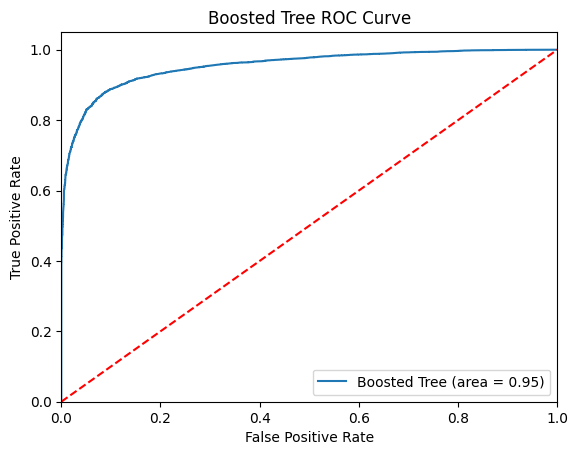

In [32]:
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])
plt.figure
plt.plot(bt_fpr, bt_tpr, label = 'Boosted Tree (area = %0.2f)' %bt_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Boosted Tree ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

Boosted Tree Model - The Boosted Tree Model has an accuracy of 0.90. For approved loans (1), the model has a precision of 0.91, recall of 0.88 and F1-score of 0.9, indicating difficulty in identifying actual loan approvals. On the other hand, for rejected loans (0), the model performs reasonably well, with a precision of 0.88,recall of 0.91 and an F1-score of 0.90. The ROC AUC score of 0.95 indicates strong discriminatory ability, similar to the random forest model.

#**Decision Tree**

In [33]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)

y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]


print('ROC AUC: ', roc_auc_score(y_test, y_pred_prob_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


ROC AUC:  0.9131597404874626
[[6917  687]
 [ 640 7040]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7604
           1       0.91      0.92      0.91      7680

    accuracy                           0.91     15284
   macro avg       0.91      0.91      0.91     15284
weighted avg       0.91      0.91      0.91     15284



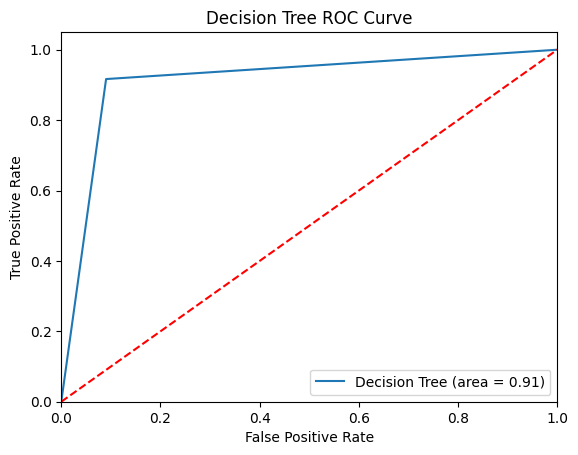

In [34]:
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Decision Tree Model **- The Decision Model has an accuracy of 0.91. For approved loans (1), the model has a precision of 0.91, recall of 0.92 and F1-score of 0.92, indicating difficulty in identifying actual loan approvals. On the other hand, for rejected loans (0), the model performs reasonably well, with a precision of 0.91, recall of 0.92 and an F1-score of 0.92. The ROC AUC score of 0.91 indicates good discriminatory ability.

# **Naive Bayes model**

In [35]:
delays_nb = MultinomialNB(alpha=0.01)
delays_nb.fit(X_train, y_train)

y_pred = delays_nb.predict(X_test)

print('ROC AUC: ', roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

ROC AUC:  0.6567535041863931
[[4976 2628]
 [2618 5062]]
              precision    recall  f1-score   support

           0       0.66      0.65      0.65      7604
           1       0.66      0.66      0.66      7680

    accuracy                           0.66     15284
   macro avg       0.66      0.66      0.66     15284
weighted avg       0.66      0.66      0.66     15284



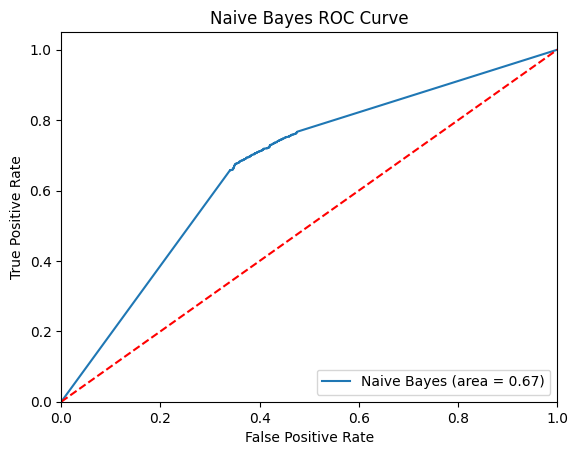

In [36]:
nb_roc_auc = roc_auc_score(y_test, delays_nb.predict_proba(X_test)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, delays_nb.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve')
plt.legend(loc="lower right")
plt.show()

Naive Bayes model - The Naive Bayes model has an accuracy of 0.66, indicating lower performance. For approved loans (1), the model has a precision of 0.66, recall of 0.66 and F1-score of 0.66, indicating difficulty in identifying actual loan approvals. On the other hand, for rejected loans (0), the model performs reasonably, with a precision of 0.66, recall of 0.65 and an F1-score of 0.65. The ROC AUC score of 0.66 indicating a moderate ability to distinguish between loan approval and rejection.

# #**ANN-MLP Classifier Model**

In [37]:
MLPC_model = MLPClassifier(hidden_layer_sizes = 20, activation = 'logistic', solver = 'adam', max_iter = 1000, random_state = 1)
MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print("ROC AUC: ", roc_auc_score(y_test, MLPC_model.predict_proba(X_test)[:,1]))
print(confusion_matrix(y_test, y_pred_mlpc))
print(classification_report(y_test, y_pred_mlpc))

ROC AUC:  0.6689732925653166
[[7286  318]
 [4833 2847]]
              precision    recall  f1-score   support

           0       0.60      0.96      0.74      7604
           1       0.90      0.37      0.53      7680

    accuracy                           0.66     15284
   macro avg       0.75      0.66      0.63     15284
weighted avg       0.75      0.66      0.63     15284



In [38]:
from sklearn.model_selection import cross_val_score
min_hidden_layer_size = 5
max_hidden_layer_size = 50
cv_scores = [ ]

for s in range(min_hidden_layer_size,max_hidden_layer_size,5):
    MLPC_model = MLPClassifier(hidden_layer_sizes=s, activation='logistic', solver='lbfgs', max_iter = 1000, random_state=1)
    scores = cross_val_score(MLPC_model,X_train,y_train.values.ravel(),cv = 5,scoring = "accuracy")
    cv_scores.append(scores.mean())

Text(0.5, 1.0, 'Effect of Hidden Nodes on Model roc_auc')

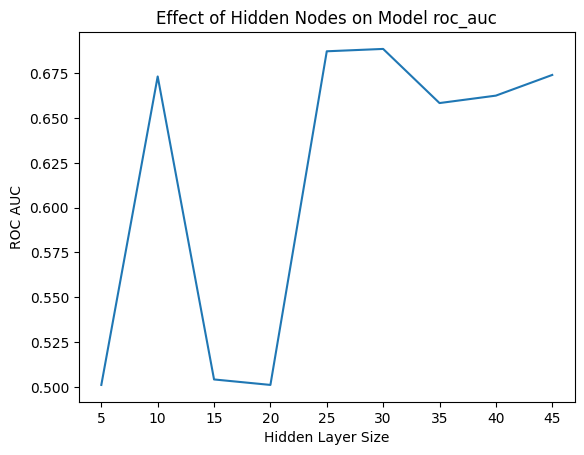

In [39]:
plot = sns.lineplot(x = range(min_hidden_layer_size, max_hidden_layer_size, 5), y = cv_scores)
plot.set(xlabel = 'Hidden Layer Size', ylabel = 'ROC AUC')
plt.title('Effect of Hidden Nodes on Model roc_auc')

In [40]:
optimal_nodes_index = np.argmax(cv_scores)
optimal_nodes = min_hidden_layer_size + optimal_nodes_index * 5
optimal_accuracy = cv_scores[optimal_nodes_index]

print(f'Optimal Number of Hidden Nodes: {optimal_nodes}')
print(f'Accuracy with Optimal Number of Hidden Nodes: {optimal_accuracy}')

Optimal Number of Hidden Nodes: 30
Accuracy with Optimal Number of Hidden Nodes: 0.6886612931341606


In [41]:
MLPC_model = MLPClassifier(hidden_layer_sizes=15, activation='logistic', solver='adam', random_state=1)

MLPC_model.fit(X_train, y_train)

y_pred_mlpc = MLPC_model.predict(X_test)

print('ROC AUC: ', roc_auc_score(y_test,MLPC_model.predict_proba(X_test)[:,1]))
print(confusion_matrix(y_test,y_pred_mlpc))
print(classification_report(y_test,y_pred_mlpc))

ROC AUC:  0.6780232683182098
[[6796  808]
 [4155 3525]]
              precision    recall  f1-score   support

           0       0.62      0.89      0.73      7604
           1       0.81      0.46      0.59      7680

    accuracy                           0.68     15284
   macro avg       0.72      0.68      0.66     15284
weighted avg       0.72      0.68      0.66     15284



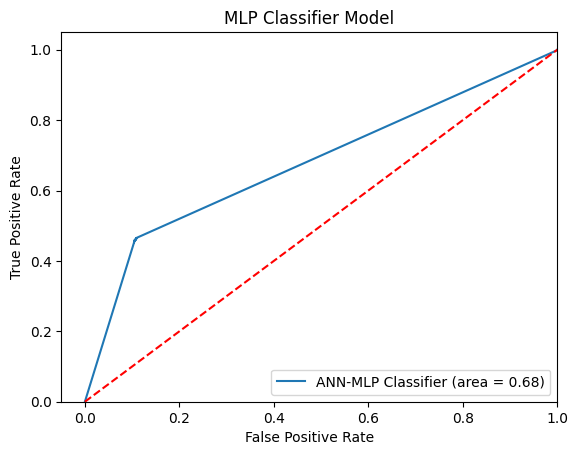

In [42]:
MLPC_roc_auc = roc_auc_score(y_test, MLPC_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, MLPC_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ANN-MLP Classifier (area = %0.2f)' % MLPC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Classifier Model')
plt.legend(loc="lower right")
plt.savefig('MLPC_ROC')
plt.show()

## **keras model**

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve


In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
model = Sequential()

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [46]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model.fit(x=X_train,
          y=y_train,
          batch_size=128,
          epochs=100,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.6147 - val_loss: 0.3216
Epoch 2/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3660 - val_loss: 0.2682
Epoch 3/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3028 - val_loss: 0.2540
Epoch 4/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2858 - val_loss: 0.2372
Epoch 5/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2695 - val_loss: 0.2331
Epoch 6/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2650 - val_loss: 0.2309
Epoch 7/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2530 - val_loss: 0.2246
Epoch 8/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2514 - val_loss: 0.2219
Epoch 9/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2469 - val_loss: 0.2202
Epoch 10/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2429 - val_loss: 0.2145
Epoch 11/100
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2345 - val_loss: 0.2155
Epoch 12/100
279/279 ━━━━━━━━━━━━━━━━━━━━

<Axes: >

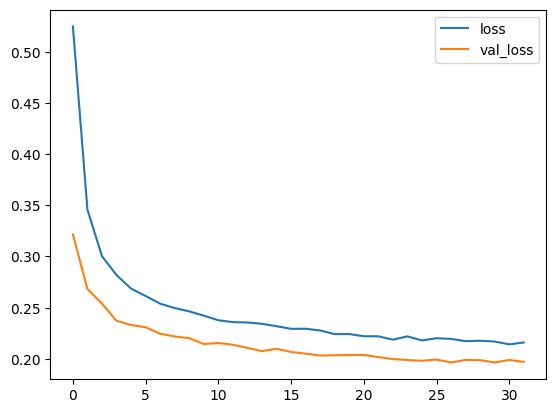

In [47]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [48]:
y_pred =(model.predict(X_test) > 0.5).astype("int32")

478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [49]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('ROC AUC: ', roc_auc_score(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7604
           1       0.96      0.89      0.92      7680

    accuracy                           0.92     15284
   macro avg       0.93      0.92      0.92     15284
weighted avg       0.93      0.92      0.92     15284

[[7307  297]
 [ 855 6825]]
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
ROC AUC:  0.968970013383855


478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


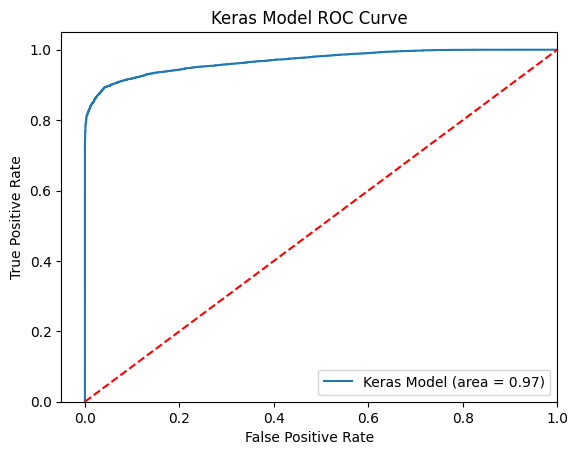

In [50]:
keras_roc_auc = roc_auc_score(y_test, model.predict(X_test))
keras_fpr, keras_tpr, keras_thresholds = roc_curve(y_test, model.predict(X_test))
plt.figure()
plt.plot(keras_fpr, keras_tpr, label='Keras Model (area = %0.2f)' % keras_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Keras Model ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Keras_ROC')
plt.show()

**Keras Model** - The Keras Model has an accuracy the highest accuracy of 0.92. For approved loans (1), the model has a precision of 0.96, recall of 0.89 and F1-score of 0.9, indicating difficulty in identifying actual loan approvals. On the other hand, for rejected loans (0), the model performs reasonably well, with a precision of 0.89,recall of 0.96 and an F1-score of 0.93. The ROC AUC score of 0.97 indicates strong discriminatory ability, similar to the random forest model.

478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


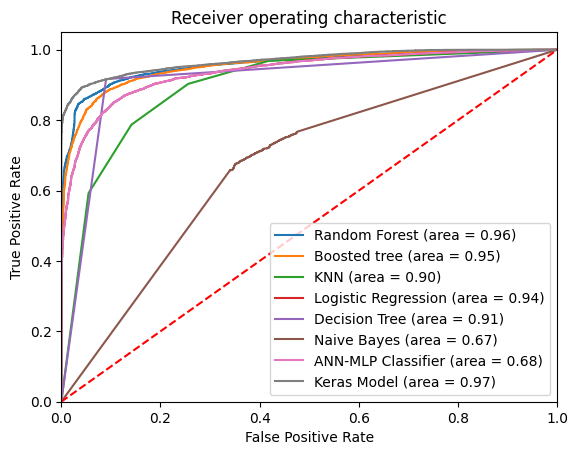

In [54]:
'''# Logistic Regression
logit_roc_auc = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
# kNN Model
knn_roc_auc = roc_auc_score(y_test, knn1.predict_proba(X_test)[:,1])
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test, knn1.predict_proba(X_test)[:,1])
# Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
# Boosted Tree
bt_roc_auc = roc_auc_score(y_test, bt_model.predict_proba(X_test)[:,1])
bt_fpr, bt_tpr, bt_thresholds = roc_curve(y_test, bt_model.predict_proba(X_test)[:,1])
#Decision Tree
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
fpr_dt, tpr_dt, threshold_dt = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
# Naive bayes
nb_roc_auc = roc_auc_score(y_test, delays_nb.predict_proba(X_test)[:,1])
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, delays_nb.predict_proba(X_test)[:,1])
#ANN Model
MLPC_roc_auc = roc_auc_score(y_test, MLPC_model.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, MLPC_model.predict_proba(X_test)[:,1])
'''
#Keras Model
keras_roc_auc = roc_auc_score(y_test, model.predict(X_test))
keras_fpr, keras_tpr, keras_thresholds = roc_curve(y_test, model.predict(X_test))

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(bt_fpr, bt_tpr, label='Boosted tree (area = %0.2f)' % bt_roc_auc)
plt.plot(fpr_knn, tpr_knn, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot(fpr, tpr, label='ANN-MLP Classifier (area = %0.2f)' % MLPC_roc_auc)
plt.plot(keras_fpr, keras_tpr, label='Keras Model (area = %0.2f)' % keras_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

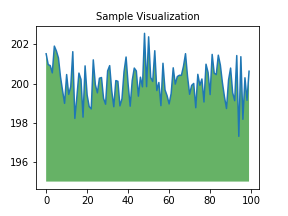

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
